In [1]:
import pandas as pd
import numpy as np
import re 
import spacy
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tharun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_csv("Elon_musk.csv",encoding="latin-1")
data.head(5)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
data.rename({"Unnamed: 0":"S_NO"},axis=1,inplace=True)
data.columns

Index(['S_NO', 'Text'], dtype='object')

In [4]:
def preprocessing(text):

    text=text.lower()
    text=re.sub('[^a-z ]' ,'',text)
    return text

In [5]:
data["Text"]=data["Text"].apply(preprocessing)

In [6]:
data = [Text.strip() for Text in data.Text]
data = [Text for Text in data if Text]

In [7]:
data

['kunalb im an alien',
 'idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it',
 'joerogan spotify great interview',
 'gtera doge is underestimated',
 'teslacn congratulations tesla china for amazing execution last year now on to the next for even more',
 'happy new year of the ox httpstcowfkmyuoj',
 'frodo was the underdogeall thought he would failhimself most of all httpstcozgxjfdzzrm',
 'owensparks flcnhvy anonyx haha thanks',
 'flcnhvy anonyx indeed tweets definitely do not represent realworld time allocation',
 'the most entertaining outcome is the most likely',
 'givedirectly just sent some',
 'just agree to do clubhouse with kanyewest',
 'httpstcorweuhsts',
 'geoffkeighley unrealengine its getting real',
 'bought some dogecoin for lil x so he can be a toddler hodler',
 'joshmanmode he definitely has issues but the sentencing seems a bit high',
 'freewalletorg thanks for fixing',
 'freewalletorg please unlock my account',
 'astrojordy ufuf',
 'this is true

# NAMED ENTITY RECOGNITION

In [8]:
nlp = spacy.load('en_core_web_sm')
def entity(line):
    one_block = line
    doc_block = nlp(one_block)
    spacy.displacy.render(doc_block, style='ent', jupyter=True)


In [9]:
line=data[4]

In [10]:
entity(line)

# SENTIMENT ANALYSIS

In [11]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [12]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [13]:
data1=pd.read_csv("Elon_musk.csv",encoding="latin-1") 
#REMOVING TRAILING AND LEADING CHARACTERS AND REMOVING EMPTY STRINGS
data1 = [Text.strip() for Text in data1.Text]
data1 = [Text for Text in data1 if Text]

In [14]:
df=pd.DataFrame(data1,columns=["Text"])

In [15]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [16]:
stemmer=PorterStemmer()

NORMALIZING,REMOVING PUNCTUATION AND NUMBERS,STEMMING AND REMOVING STOP WORDS

In [18]:
def preprocessing(text):

    text=text.lower()
    text=re.sub('[^a-z ]' ,'',text)
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in stopwords.words("english") ]
    text=" ".join(text)
    return text

In [19]:
df["Text"]=df["Text"].apply(preprocessing)

In [20]:
df

,Text
0,kunalb im alien
1,idaacarmack ray trace cyberpunk hdr nextlevel tri
2,joerogan spotifi great interview
3,gtera doge underestim
4,teslacn congratul tesla china amaz execut last...
...,...
1994,flcnhvi true sound surreal neg propaganda stil...
1995,ppathol make sure read ur term amp condit clic...
1996,teslagong ppathol samwis gamge
1997,ppathol altho dumb dumber ufuf


In [21]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [22]:
df["sentiment_scores"]=df["Text"].apply(calculate_sentiment)

In [23]:
df

,Text,sentiment_scores
0,kunalb im alien,0
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0
2,joerogan spotifi great interview,3
3,gtera doge underestim,0
4,teslacn congratul tesla china amaz execut last...,0
...,...,...
1994,flcnhvi true sound surreal neg propaganda stil...,-2
1995,ppathol make sure read ur term amp condit clic...,1
1996,teslagong ppathol samwis gamge,0
1997,ppathol altho dumb dumber ufuf,-6


In [24]:
df["sentiment_scores"].value_counts()

 0     1318
 3      178
 2      130
 1      124
-2       62
-1       54
 4       49
-3       26
 5       24
 6       11
-4        6
 7        5
 8        4
-5        4
-6        2
-7        1
 10       1
Name: sentiment_scores, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df['word_count'] = df["Text"].str.split().apply(len)
df.head(10)

,Text,sentiment_scores,word_count
0,kunalb im alien,0,3
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0,7
2,joerogan spotifi great interview,3,4
3,gtera doge underestim,0,3
4,teslacn congratul tesla china amaz execut last...,0,10
5,happi new year ox httpstcowfkmyuoj,0,5
6,frodo underdogeal thought would failhimself ht...,0,6
7,owenspark flcnhvi anonyx haha thank,5,5
8,flcnhvi anonyx inde tweet definit repres realw...,0,9
9,entertain outcom like,2,3


D:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_scores', ylabel='Density'>

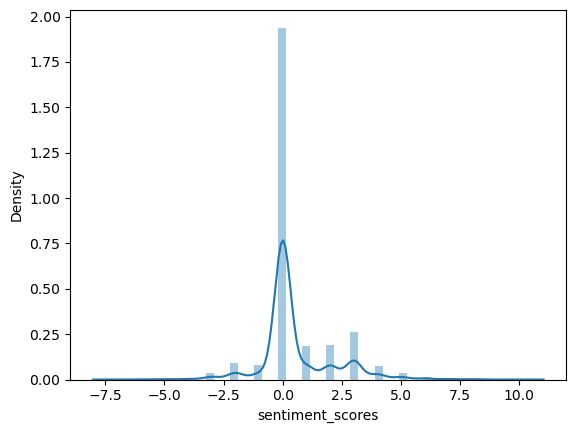

In [27]:
sns.distplot(df["sentiment_scores"])

<AxesSubplot:xlabel='word_count', ylabel='sentiment_scores'>

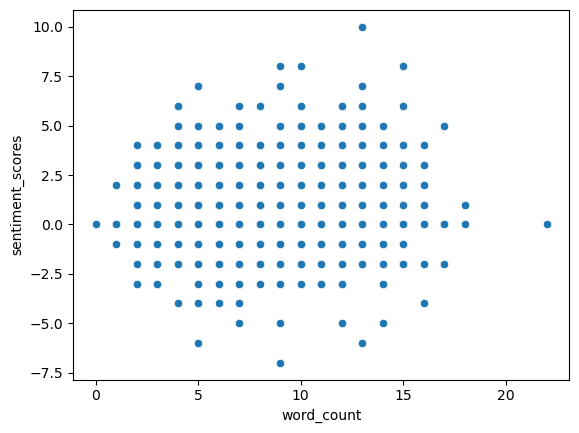

In [28]:
sns.scatterplot(x="word_count",y="sentiment_scores",data=df)

In [29]:
text = ' '.join(df["Text"])
text

'kunalb im alien idaacarmack ray trace cyberpunk hdr nextlevel tri joerogan spotifi great interview gtera doge underestim teslacn congratul tesla china amaz execut last year next even happi new year ox httpstcowfkmyuoj frodo underdogeal thought would failhimself httpstcozgxjfdzzrm owenspark flcnhvi anonyx haha thank flcnhvi anonyx inde tweet definit repres realworld time alloc entertain outcom like givedirectli sent agre clubhous kanyewest httpstcorweuhst geoffkeighley unrealengin get real bought dogecoin lil x toddler hodler joshmanmod definit issu sentenc seem bit high freewalletorg thank fix freewalletorg pleas unlock account astrojordi ufuf true power haha httpstcofcuhqsdo freewalletorg crypto wallet wont give privat key avoid cost freewalletorg app suck rt spacex nasa select falcon heavi launch first two element lunar gateway togeth one mission httpstcopwt ajtourvil ye blkmdl rationaletienn adamklotz predict cash flow reason well starlink ipo rationaletienn adamklotz starlink stag

In [30]:
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

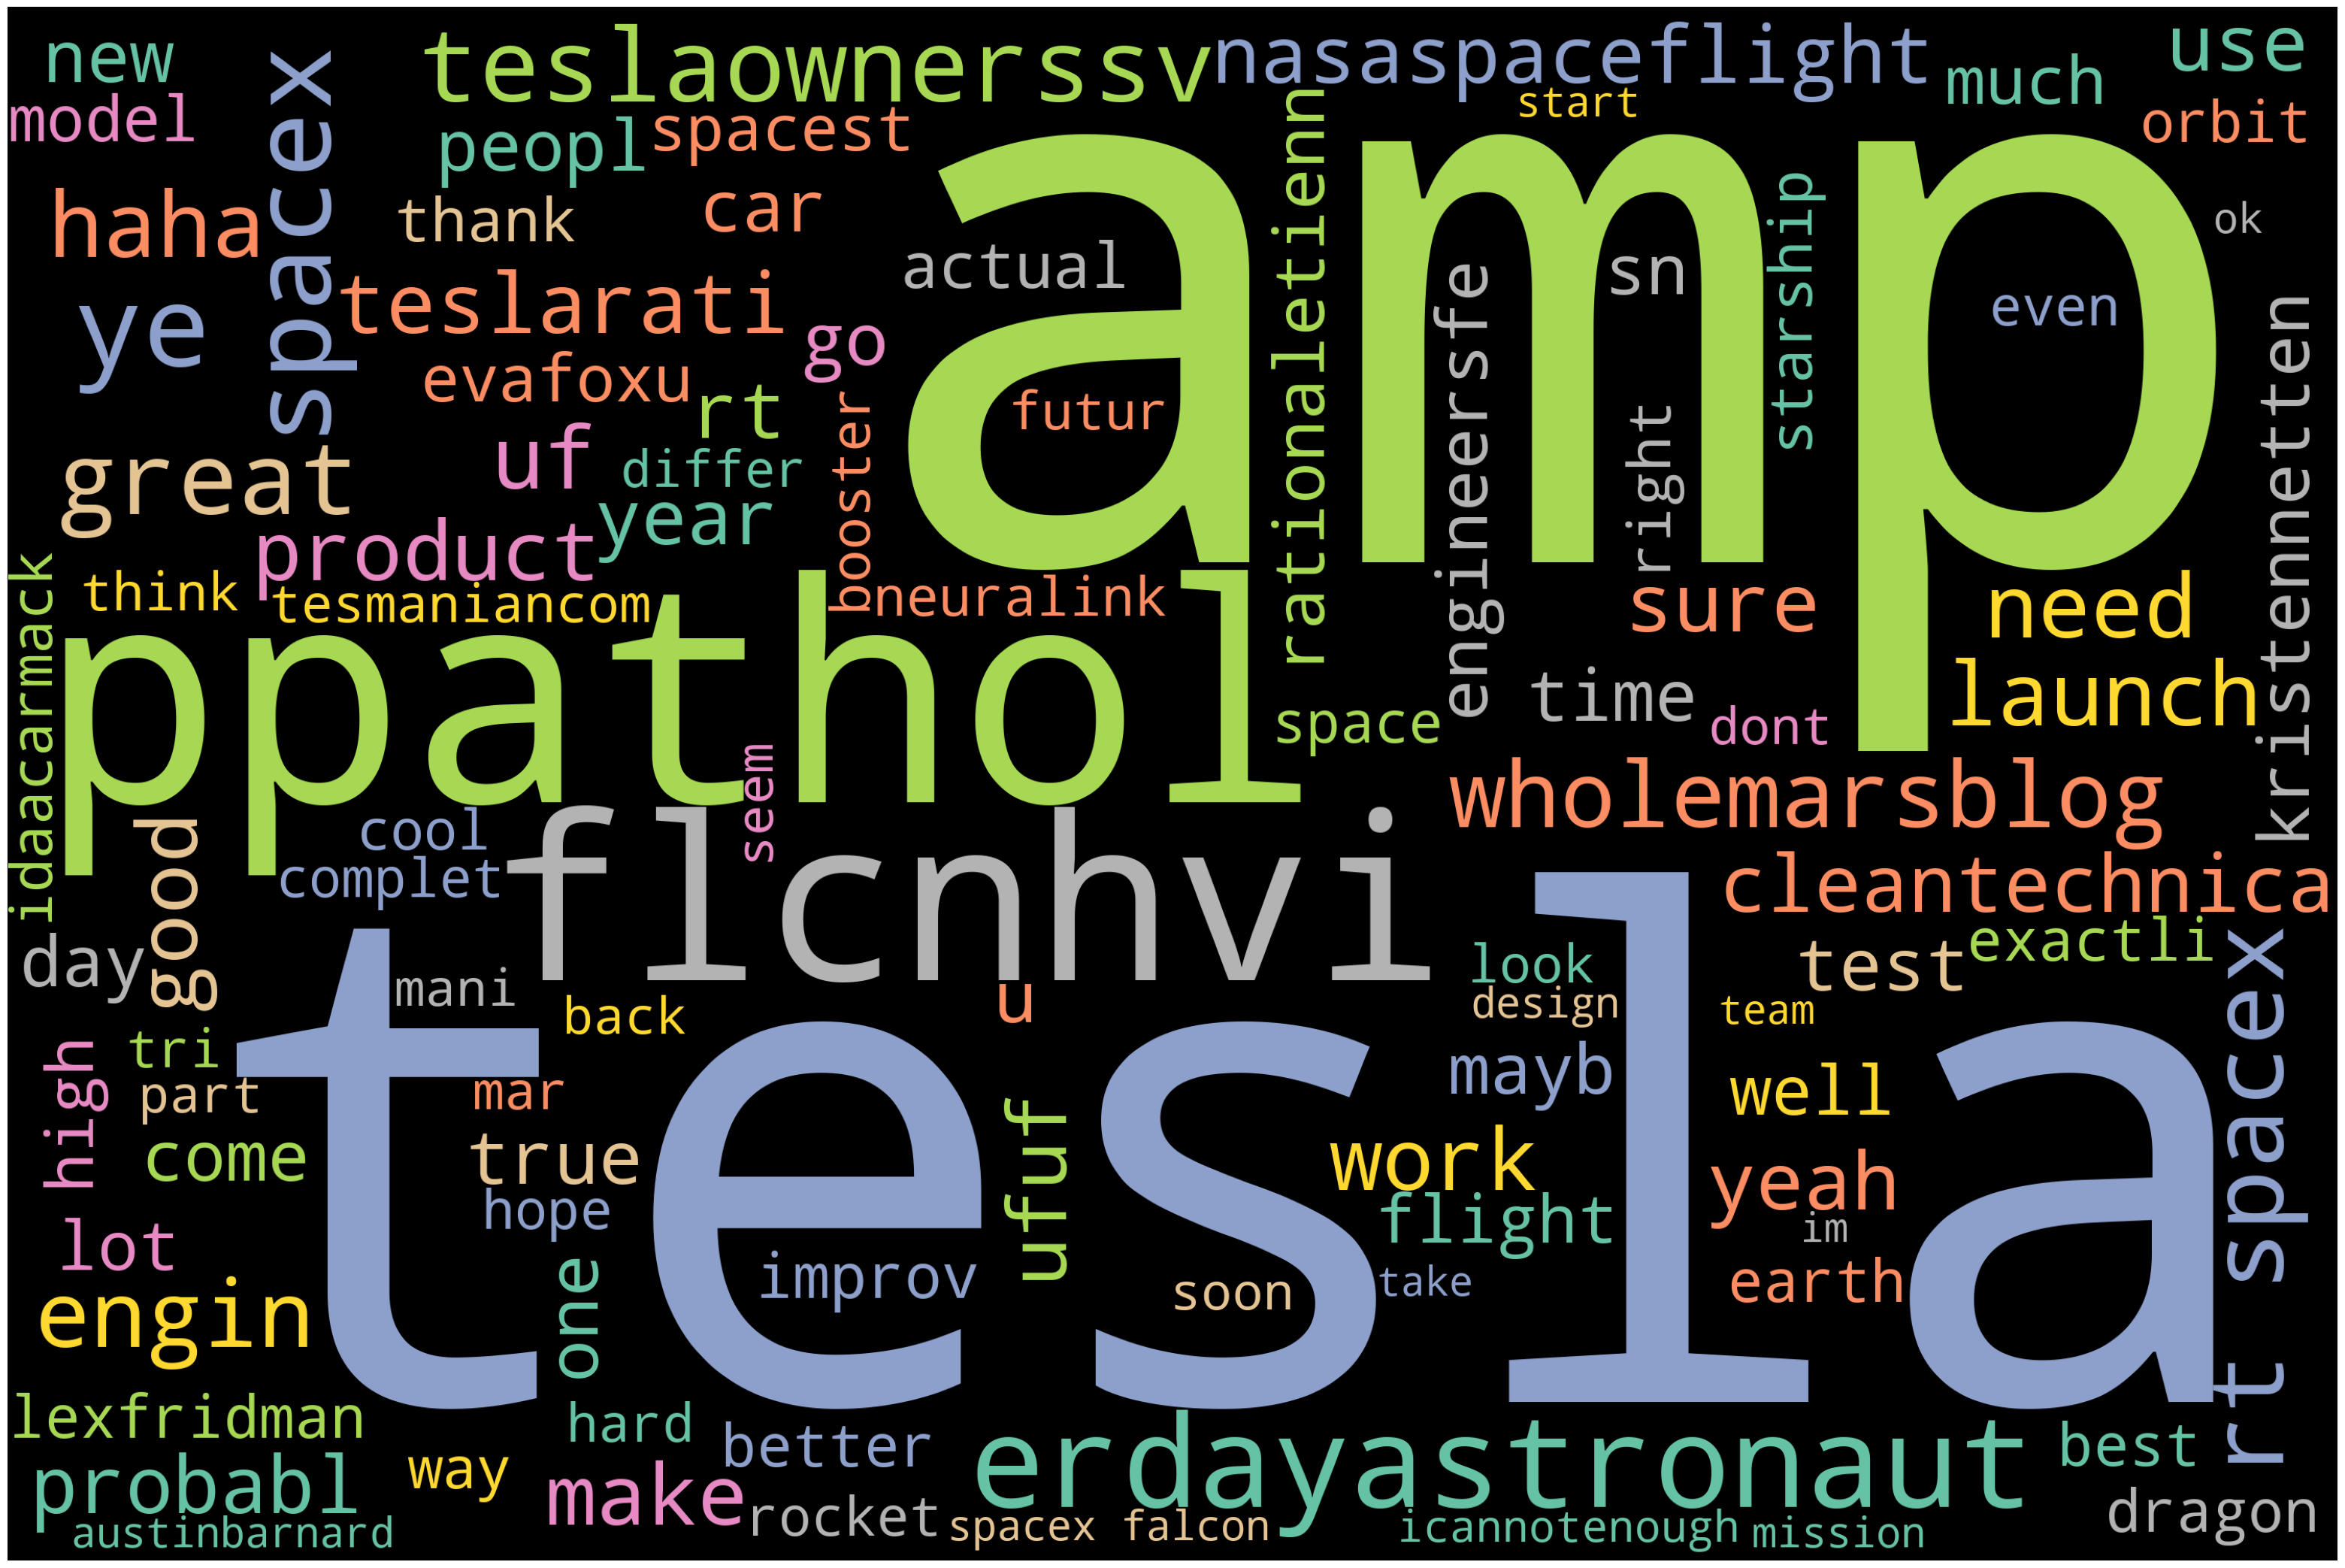

In [31]:
stopwords = STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)